# **Clusterização da base de dados, que possui diversos atributos numéricos e característicos de jogadores de futebol.**

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/content/2022-2023 Football Player Stats.csv', encoding='ISO-8859-1', delimiter=';')

df.head()


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,...,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.00,0.23,2.02,0.0,0.0,0.00,6.51,0.31,0.39,44.4


In [3]:
df = df.drop('Rk', axis=1)


#**AVALIAÇÃO GERAL DA BASE**
ENTENDENDO COMO ESTÁ ORGANIZADA, VERIFICANDO SE HÁ VALORES FALTANTES, ETC.

In [4]:
info_erling_haaland = df[df['Player'] == 'Eerling Haaland']

# Imprimir todas as informações relacionadas ao jogador 'Erling Haaland'
print(info_erling_haaland.Pos)

Series([], Name: Pos, dtype: object)


<Axes: xlabel='Pos', ylabel='Count'>

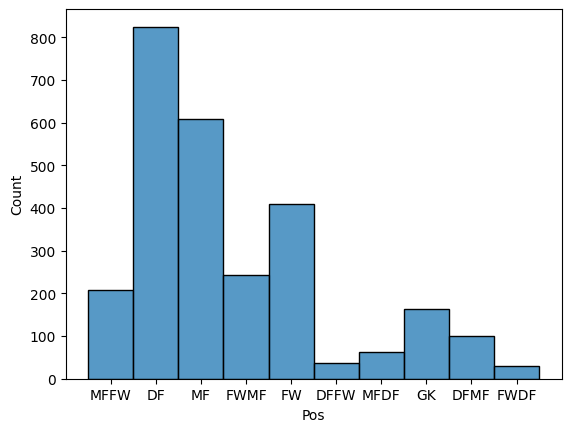

In [5]:
sns.histplot(df['Pos'])

In [6]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 123 columns):
 #    Column         Dtype  
---   ------         -----  
 0    Player         object 
 1    Nation         object 
 2    Pos            object 
 3    Squad          object 
 4    Comp           object 
 5    Age            int64  
 6    Born           int64  
 7    MP             int64  
 8    Starts         int64  
 9    Min            int64  
 10   90s            float64
 11   Goals          int64  
 12   Shots          float64
 13   SoT            float64
 14   SoT%           float64
 15   G/Sh           float64
 16   G/SoT          float64
 17   ShoDist        float64
 18   ShoFK          float64
 19   ShoPK          float64
 20   PKatt          float64
 21   PasTotCmp      float64
 22   PasTotAtt      float64
 23   PasTotCmp%     float64
 24   PasTotDist     float64
 25   PasTotPrgDist  float64
 26   PasShoCmp      float64
 27   PasShoAtt      float64
 28   PasShoCmp%     f

In [7]:
print(df.isnull().sum())

Player     0
Nation     1
Pos        0
Squad      0
Comp       0
          ..
OG         0
Recov      0
AerWon     0
AerLost    0
AerWon%    0
Length: 123, dtype: int64


In [8]:
df.describe()

,Age,Born,MP,Starts,Min,90s,Goals,Shots,SoT,SoT%,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
count,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,...,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000,2689.000000
mean,26.011157,1996.155820,11.833023,8.476013,760.451097,8.450465,1.027520,1.245787,0.411261,24.222164,...,0.204697,1.661636,0.990569,0.009249,0.015173,0.003142,4.951967,1.312064,1.497356,43.583600
std,4.446259,4.450108,6.864278,6.994383,591.094260,6.567484,2.013714,1.424619,0.754716,24.249242,...,0.552376,2.319000,1.235965,0.043781,0.077399,0.022607,2.901833,1.579539,1.830391,26.673092
min,15.000000,1981.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1993.000000,5.000000,2.000000,194.000000,2.200000,0.000000,0.260000,0.000000,0.000000,...,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,3.330000,0.330000,0.550000,27.600000
50%,26.000000,1996.000000,13.000000,7.000000,684.000000,7.600000,0.000000,0.860000,0.180000,24.000000,...,0.000000,0.760000,0.830000,0.000000,0.000000,0.000000,5.000000,0.930000,1.100000,46.400000
75%,29.000000,2000.000000,18.000000,14.000000,1245.000000,13.800000,1.000000,1.850000,0.590000,40.000000,...,0.210000,2.500000,1.320000,0.000000,0.000000,0.000000,6.270000,1.790000,1.830000,60.000000
max,41.000000,2007.000000,23.000000,23.000000,2070.000000,23.000000,25.000000,15.000000,10.000000,100.000000,...,10.000000,30.000000,20.000000,0.870000,2.000000,0.500000,30.000000,25.000000,30.000000,100.000000


# Divisão dos dataframes e separação das features utilizadas para a clusterização decada conjunto de dados, no caso, as posições que estão generalizadas.





In [9]:
#Divisão do data-frame em data-frames por posição
# Defensor
df_df = df[df['Pos'] == 'DF'].copy()
# Meio-Campista
df_mf = df[df['Pos'] == 'MF'].copy()
# Atacante-Meio-Campista
df_fwmf = df[df['Pos'] == 'FWMF'].copy()
# Atacante, de qualquer tipo
df_fw = df[df['Pos'] == 'FW'].copy()
# Defensor-Atacante
df_dffw = df[df['Pos'] == 'DFFW'].copy()
# Meio-Campista-Defensor
df_mfdf = df[df['Pos'] == 'MFDF'].copy()
# Goleiro (Goalkeeper)
df_gk = df[df['Pos'] == 'GK'].copy()
# Defensor-Meio-Campista
df_dfmf = df[df['Pos'] == 'DFMF'].copy()
# Atacante-Defensor
df_fwdf = df[df['Pos'] == 'FWDF'].copy()
# Meio-Campista-Atacante
df_mffw = df[df['Pos']=='MFFW'].copy()



In [10]:
#Features para treino por cada posição
fw_features = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis","PasTotCmp"]
mf_features = ["Goals","PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov", "Carries", "CarTotDist", "CarPrgDist" , "Fld"]
df_features = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks",
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr","Carries","CarTotDist"
                     ,"TouDefPen","TouDef3rd","TouMid3rd","TouAtt3rd","TouAttPen","Assists"]
dfmf_features=["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks",
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr","Carries","CarTotDist"
                     ,"TouDefPen","TouDef3rd","TouMid3rd","TouAtt3rd","TouAttPen",'GCA','GcaPassLive','GcaPassDead','GcaDrib']
mfdf_features=["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists","PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl"]
dffw_features=["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks",
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr","Carries","CarTotDist"
                     ,"TouDefPen","TouDef3rd","TouMid3rd","TouAtt3rd","TouAttPen","Assists","Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib" , "GCA","PasAss", "Pas3rd"]
fwmf_features=["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis","PasTotCmp","PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%"]
fwdf_features=["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis","PasTotCmp","PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%"]
gk_features=["PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp",
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive",
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri",
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int"]

In [11]:
#Data-frames de cada posição apenas com as deatures para treino
df_ataq = df_fw[fw_features].copy()
df_def= df_df[df_features].copy()
df_mei = df_mf[mf_features].copy()
df_ataqmei = df_fwmf[fwmf_features].copy()
df_meidef= df_mfdf[mfdf_features].copy()
df_defataq= df_dffw[dffw_features].copy()
df_gol=df_gk[gk_features].copy()
df_ataqdef = df_fwdf[fwdf_features].copy()
df_defmei = df_dfmf[dfmf_features].copy()
df_meiataq=df_mffw[fwmf_features].copy()

# Busca de Hiperparâmetros e aplicação modelo utilizado, K-means, em cada um dos subconjuntos.


In [12]:
model = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('clusterizer', KMeans())
])

param_grid = {
    'clusterizer__n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'clusterizer__init': ['k-means++', 'random'],
    'clusterizer__n_init': [10, 20, 30, 40, 50],
    'clusterizer__max_iter': [100, 200, 300, 400, 500]
}

In [13]:
#Função de busca de hiperparâmetros e treino
def train(df,model,param_grid):
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

  grid_search.fit(df)

  bestmodel = grid_search.best_estimator_
  print(f'Base {df} ',grid_search.best_params_)
  bestmodel.fit(df)
  predictions = bestmodel.predict(df)
  print(predictions)
  return predictions

In [14]:
DFS = [df_ataq,df_def,df_mei,df_gol,df_ataqdef,df_ataqmei,df_defataq,df_defmei,df_meidef,df_meiataq]

In [15]:
for x in DFS:
  x['Cluster']=train(x,model=model,param_grid=param_grid)

Base       Goals  Shots   SoT  G/Sh  G/SoT  ShoDist   GCA   SCA   Off  PKwon  ...  \
10        6   2.67  1.25  0.13   0.27     11.6  0.51  3.07  0.51   0.06  ...   
12        0   2.50  0.00  0.00   0.00     26.1  0.00  2.50  0.00   0.00  ...   
14        4   2.06  0.74  0.11   0.31     14.5  0.29  2.63  0.40   0.00  ...   
20        1   1.94  0.69  0.07   0.20     12.3  0.42  2.64  0.28   0.00  ...   
33        0   0.00  0.00  0.00   0.00      0.0  0.00  0.00  0.00   0.00  ...   
...     ...    ...   ...   ...    ...      ...   ...   ...   ...    ...  ...   
2657      1   2.84  0.68  0.05   0.20     15.7  0.41  2.70  0.54   0.14  ...   
2667      0   1.67  1.67  0.00   0.00     13.8  0.00  0.00  1.67   0.00  ...   
2674      1   3.08  0.77  0.06   0.25     14.4  0.58  4.04  0.19   0.00  ...   
2677      3   1.93  0.59  0.12   0.38     12.8  0.07  1.11  0.44   0.00  ...   
2687      1   1.03  0.26  0.13   0.50     11.0  0.13  2.82  0.38   0.00  ...   

      ScaFld  ToAtt  ToSuc  Carrie

# Verificação dos resultados da clusterização
Visualizando os resultados da aplicação do algorítimo manualmente.


In [16]:
#Atribuição dos nomes para os data-frames com as features específicas e clusters
df_ataq['Player'] = df_fw['Player']
df_def['Player'] = df_df['Player']
df_mei['Player'] = df_mf['Player']
df_defmei['Player'] = df_dfmf['Player']
df_meidef['Player'] = df_mfdf['Player']
df_defataq['Player'] = df_dffw['Player']
df_gol['Player'] = df_gk['Player']
df_ataqdef['Player'] = df_fwdf['Player']
df_ataqmei['Player']=df_fwmf['Player']
df_meiataq['Player']=df_mffw['Player']



In [17]:
#Verificação da distribuição dos clusters
jogadores = ['Vinicius Júnior', 'Erling Haaland', 'Kylian Mbappé', 'Robert Lewandowski', 'Mohamed Salah',
             'Jack Grealish', 'Ousmane Dembélé', 'Victor Osimhen', 'Lautaro Martínez','Raphinha','Joselu']


for jogador in jogadores:
    print(f"Informações de {jogador} em df_ataq:")
    info_df_ataq = df_ataq[df_ataq['Player'] == jogador]
    if not info_df_ataq.empty:
        print(info_df_ataq)
    else:
        print(f"{jogador} não encontrado em df_ataq.")
    print("\n")

Informações de Vinicius Júnior em df_ataq:
      Goals  Shots   SoT  G/Sh  G/SoT  ShoDist   GCA   SCA   Off  PKwon  ...  \
1233      7   2.51  1.23  0.14   0.29     16.4  0.56  4.51  0.62   0.05  ...   

      ToSuc  Carries  CarTotDist  CarPrgDist   CPA  CarMis  CarDis  PasTotCmp  \
1233   2.82     41.1       323.2       175.6  3.64    2.82     1.9       27.7   

      Cluster           Player  
1233        3  Vinicius Júnior  

[1 rows x 26 columns]


Informações de Erling Haaland em df_ataq:
      Goals  Shots   SoT  G/Sh  G/SoT  ShoDist   GCA   SCA   Off  PKwon  ...  \
1057     25   3.85  1.98   0.3   0.58     12.6  0.38  2.03  0.27   0.05  ...   

      ToSuc  Carries  CarTotDist  CarPrgDist   CPA  CarMis  CarDis  PasTotCmp  \
1057   0.27     12.6        55.7        20.5  0.93    1.43    0.99       11.7   

      Cluster          Player  
1057        8  Erling Haaland  

[1 rows x 26 columns]


Informações de Kylian Mbappé em df_ataq:
      Goals  Shots   SoT  G/Sh  G/SoT  ShoDist

In [18]:
#Verificação da distribuição dos clusters
jogadores = ['Trent Alexander-Arnold', 'Virgil van Dijk', 'Rúben Dias', 'Thiago Silva', 'Kyle Walker',
             'David Alaba', 'Alphonso Davies', 'Aymeric Laporte','Lisandro Martínez','Éder Militão']


for jogador in jogadores:
    print(f"Informações de {jogador} em df_def:")
    info_df_def = df_def[df_def['Player'] == jogador]
    if not info_df_def.empty:
        print(info_df_def)
    else:
        print(f"{jogador} não encontrado em df_def.")
    print("\n")

Informações de Trent Alexander-Arnold em df_def:
    PasTotCmp  PasTotDist  PasTotPrgDist   Tkl  TklWon  TklDef3rd  TklMid3rd  \
63       64.9      1236.3          518.4  1.44    1.06       0.94       0.31   

    TklAtt3rd  TklDri  TklDriAtt  ...  Carries  CarTotDist  TouDefPen  \
63       0.19     1.0       1.88  ...     52.4       196.1       3.06   

    TouDef3rd  TouMid3rd  TouAtt3rd  TouAttPen  Assists  Cluster  \
63       22.4       48.8       26.8       1.69     0.06        3   

                    Player  
63  Trent Alexander-Arnold  

[1 rows x 35 columns]


Informações de Virgil van Dijk em df_def:
      PasTotCmp  PasTotDist  PasTotPrgDist   Tkl  TklWon  TklDef3rd  \
2514       71.5      1417.9          504.7  0.61    0.18       0.42   

      TklMid3rd  TklAtt3rd  TklDri  TklDriAtt  ...  Carries  CarTotDist  \
2514       0.18        0.0    0.12       0.24  ...     54.2       220.1   

      TouDefPen  TouDef3rd  TouMid3rd  TouAtt3rd  TouAttPen  Assists  Cluster  \
2514  

In [19]:
print(df_ataqmei['Cluster'])

6       8
7       3
9       9
16      0
19      9
       ..
2635    5
2642    9
2644    9
2665    7
2675    7
Name: Cluster, Length: 244, dtype: int32


<Axes: xlabel='Cluster', ylabel='Count'>

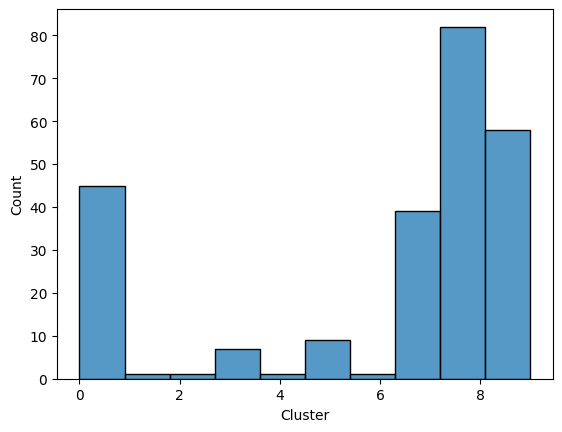

In [20]:
sns.histplot(df_ataqmei['Cluster'])

In [21]:
for x in df_ataqmei['Player'],df_ataqmei['Cluster']:
  print(x)

6          Matthis Abline
7          Matthis Abline
9       Zakaria Aboukhlal
16         Sargis Adamyan
19          Karim Adeyemi
              ...        
2635        Kelvin Yeboah
2642      Mattia Zaccagni
2644        Wilfried Zaha
2665         Arber Zeneli
2675         Hakim Ziyech
Name: Player, Length: 244, dtype: object
6       8
7       3
9       9
16      0
19      9
       ..
2635    5
2642    9
2644    9
2665    7
2675    7
Name: Cluster, Length: 244, dtype: int32


# Adicionando o cluster de cada instância ao dataframe original, para gerar um novo dataframe a partir do processo.

In [22]:
#Função para colocar os clusters, dos data frames posicionais, no dataframe original
def addClusters(df_geral,df_pos):

  df_final = pd.merge(df_geral, df_pos[['Player', 'Cluster']], on='Player', how='left')
  return df_final


In [23]:
dfs_clusters = []

for df_pos in DFS:
    df_cluster = df_pos[['Player', 'Cluster']].copy()
    dfs_clusters.append(df_cluster)


df_clusters_ = pd.concat(dfs_clusters, ignore_index=True)
print(df_clusters_)

                Player  Cluster
0        Tammy Abraham        8
1         Mohamed Achi        3
2            Che Adams        8
3           Amine Adli        6
4           Amar Ahmed        1
...                ...      ...
2684   Rodrigo Zalazar        2
2685  Luca Zanimacchia        1
2686    Nicolò Zaniolo        2
2687      Oier Zarraga        7
2688     Filip ?uri?i?        2

[2689 rows x 2 columns]


In [24]:
df2=df
df_final1=pd.DataFrame(addClusters(df2,df_clusters_))

In [25]:
nomes_na = df_final1.loc[df_final1['Cluster'].isna(), ['Player', 'Pos']]


# Exibir os nomes dos jogadores
print(nomes_na)

Empty DataFrame
Columns: [Player, Pos]
Index: []


In [26]:
#Verificação se há jogadores sem cluster
df_final1['Cluster'].isnull().sum()

0

In [27]:
#Verificação da distribuição dos clusters
jogadores = ['Mounaim El Idrissy', 'Borja Iglesias', 'Joselu','Michael Gregoritsch','Philipp Hofmann','Brennan Johnson ']


for jogador in jogadores:
    print(f"Informações de {jogador} em df_ataq:")
    info_df_ataq = df_ataq[df_ataq['Player'] == jogador]
    if not info_df_ataq.empty:
        print(info_df_ataq)
    else:
        print(f"{jogador} não encontrado em df_ataq.")
    print("\n")

Informações de Mounaim El Idrissy em df_ataq:
      Goals  Shots  SoT  G/Sh  G/SoT  ShoDist   GCA   SCA   Off  PKwon  ...  \
1153      4    2.2  0.9   0.1   0.25     14.6  0.11  1.75  0.96   0.11  ...   

      ToSuc  Carries  CarTotDist  CarPrgDist   CPA  CarMis  CarDis  PasTotCmp  \
1153   0.28     21.6       120.6        32.3  0.17    3.28     1.3       15.4   

      Cluster              Player  
1153        8  Mounaim El Idrissy  

[1 rows x 26 columns]


Informações de Borja Iglesias em df_ataq:
      Goals  Shots   SoT  G/Sh  G/SoT  ShoDist  GCA   SCA   Off  PKwon  ...  \
1155      9   2.38  0.85  0.13   0.36     15.4  0.3  1.59  0.91    0.0  ...   

      ToSuc  Carries  CarTotDist  CarPrgDist   CPA  CarMis  CarDis  PasTotCmp  \
1155   0.49     16.8        82.0        30.0  1.22    2.87    1.46       14.2   

      Cluster          Player  
1155        8  Borja Iglesias  

[1 rows x 26 columns]


Informações de Joselu em df_ataq:
      Goals  Shots  SoT  G/Sh  G/SoT  ShoDist   

In [28]:
df_final1.to_csv('/content/dfFootaballClusters.csv',  index=False, sep=';', encoding='ISO-8859-1', float_format='%.2f')
